# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.






### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import colors
import seaborn as sns
%matplotlib inline

### Question 1. (5pts) Create a new variable, DELAY_OR_NOT: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (ARRIVAL_DELAY >= 15).

In [2]:
df1 = pd.read_csv('cs109a_midterm.csv')
df1['DELAY_OR_NOT'] = np.where(df1['ARRIVAL_DELAY']>=15, 1, 0)
df1.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0


### Question 2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used.

In [3]:
print("the names of all columns:\n", list(df1))

the names of all columns:
 ['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_OR_NOT']


#### Predictors should not be used:
- ARRIVAL_DELAY: This column has already be encoded into the "DELAY_OR_NOT" column. If we use this column, we are like cheating to have y information to classify y.
- DEPARTURE_DELAY: Same idea as above. If the flight is delayed at departure, it is very likely that it will be delayed at arrival.
- ELAPSED_TIME: This information should not be used too, because we want to predict whether a flight is delayed or not based only on the information before it takes off.
- AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY: Similarly, we don't know whether the flight is delayed or not when we are building the model. So we should not have access to such "future" information.

### Question 3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

#### Intuition 1:
- Do delays vary across airlines?

In [4]:
delay_airlines = df1.groupby('AIRLINE')['DELAY_OR_NOT'].mean()
delay_airlines = delay_airlines.sort_values(ascending=False)
delay_airlines

AIRLINE
NK    0.372764
F9    0.226847
B6    0.159416
MQ    0.136061
UA    0.134035
VX    0.123715
EV    0.117014
WN    0.109512
US    0.103044
AA    0.089197
OO    0.088212
DL    0.044268
AS    0.038682
HA    0.033147
Name: DELAY_OR_NOT, dtype: float64

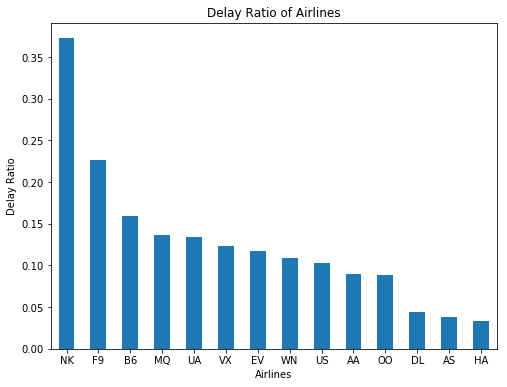

In [5]:
ax = delay_airlines.plot(kind='bar', title="Delay Ratio of Airlines", figsize=(8,6), rot=0)
ax.set_xlabel('Airlines')
ax.set_ylabel('Delay Ratio')
plt.show()

The top 3 airlines with HIGHEST delay ratios are:
- NK (Spirit Airlines): 37.3%
- F9 (Frontier AIrlines): 22.7%
- B6 (JetBlue): 15.9%

The top 3 airlines with LOWEST delay ratios are:
- HA (Hawaiian Airlines): 3.3%
- AS (Alaska Airlines): 3.9%
- DL (Delta Airlines): 4.4%

#### Intuition 2:
- Do delays vary across time of departure?

In [6]:
df2 = df1.copy()
# df2.sort('SCHED_DEP')
df2 = df1.sort_values(by='SCHED_DEP')
df2.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
749153,2015-11-30,11,30,1,UA,1561,N75435,ORD,PHL,00:01:00,...,8.0,678,122.0,105.0,NaN,NaN,NaN,NaN,NaN,0
475886,2015-11-30,11,30,1,UA,822,N483UA,ORD,BDL,00:01:00,...,-9.0,783,129.0,113.0,NaN,NaN,NaN,NaN,NaN,0
652920,2015-12-28,12,28,1,UA,1456,N808UA,DEN,BZN,00:02:00,...,7.0,524,112.0,97.0,NaN,NaN,NaN,NaN,NaN,0
16660,2015-07-18,7,18,6,NK,298,N605NK,LAS,IAH,00:03:00,...,-1.0,1222,177.0,182.0,NaN,NaN,NaN,NaN,NaN,0
683555,2015-07-28,7,28,2,NK,298,N621NK,LAS,IAH,00:03:00,...,-2.0,1222,177.0,176.0,NaN,NaN,NaN,NaN,NaN,0


In [7]:
dep_time = df2['SCHED_DEP'].values
dep_hour = []
for t in dep_time:
    dep_hour.append(t[:2])
dep_h = list(map(int, dep_hour))
df2['dep_hour'] = dep_h

delay_dep_hours = df2.groupby('dep_hour')['DELAY_OR_NOT'].mean()
# delay_dep_hours

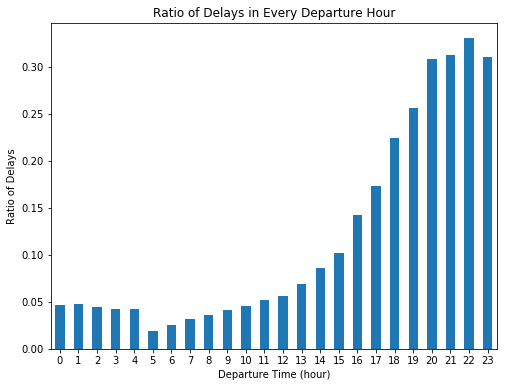

In [8]:
ax = delay_dep_hours.plot(kind='bar', title="Ratio of Delays in Every Departure Hour", figsize=(8,6), rot=0)
ax.set_xlabel('Departure Time (hour)')
ax.set_ylabel('Ratio of Delays')
plt.show()

From the above graph, we can see that late afternoon (starting from about 3-4pm) till late night is more likely to have delays compared to early morning till early noon.

Also, we can see that night time (8pm - 11pm) has extremely high delay ratio.

#### Intuition 3:
- Do delays vary across different airports?

In [9]:
ORD_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'ORD']['DELAY_OR_NOT'].mean()
BOS_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'BOS']['DELAY_OR_NOT'].mean()
LAX_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'LAX']['DELAY_OR_NOT'].mean()
JFK_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'JFK']['DELAY_OR_NOT'].mean()
LAS_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'LAS']['DELAY_OR_NOT'].mean()
DEN_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'DEN']['DELAY_OR_NOT'].mean()
SEA_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'SEA']['DELAY_OR_NOT'].mean()
SFO_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'SFO']['DELAY_OR_NOT'].mean()
ATL_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'ATL']['DELAY_OR_NOT'].mean()
DFW_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'DFW']['DELAY_OR_NOT'].mean()
PHX_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'PHX']['DELAY_OR_NOT'].mean()
IAH_mean = df1.loc[df1['ORIGIN_AIRPORT'] == 'IAH']['DELAY_OR_NOT'].mean()

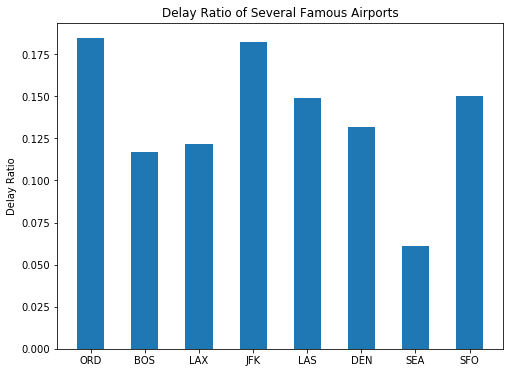

In [10]:
plt.figure(figsize=(8, 6))
airports = ('ORD', 'BOS', 'LAX', 'JFK', 'LAS','DEN','SEA','SFO')
y_pos = np.arange(len(airports))
airport_means = [ORD_mean, BOS_mean, LAX_mean, JFK_mean, LAS_mean, DEN_mean, SEA_mean, SFO_mean]

plt.bar(y_pos, airport_means, align='center', width=0.5)
plt.xticks(y_pos, airports)
plt.ylabel('Delay Ratio')
plt.title('Delay Ratio of Several Famous Airports')
plt.show()

I chose 8 airports in big cities across US, and we can see from the above graph that the delays do vary across airports: ORD and JFK have the highest delay ratio among the above airports. This makes sense because these two are known as the busiest airports in the world, which are located in Chicago and New York city.

#### Intuition 4:
- Do delays vary across airport traffic?

In [11]:
DEP_rank = df1['ORIGIN_AIRPORT'].value_counts()[:10]
ARR_rank = df1['DESTINATION_AIRPORT'].value_counts()[:10]
# DEP_rank, ARR_rank

In [12]:
busiest = pd.concat([DEP_rank, ARR_rank], axis=1, join='inner')
busiest["Traffic"] = busiest["ORIGIN_AIRPORT"] + busiest["DESTINATION_AIRPORT"]
traffic = busiest["Traffic"].values
# traffic
# busiest

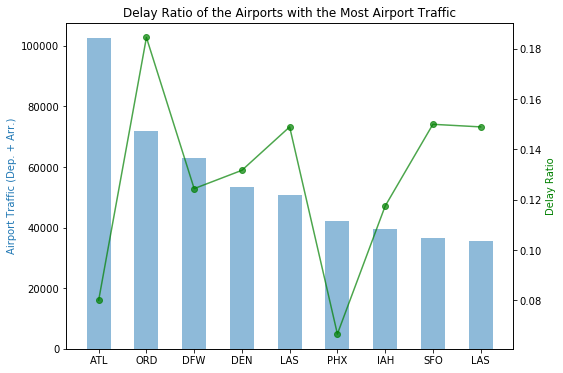

In [13]:
fig,ax1 = plt.subplots(figsize=(8, 6))
busiest_airports = ('ATL', 'ORD', 'DFW', 'DEN', 'LAS','PHX','IAH','SFO','LAS')
y_pos = np.arange(len(busiest_airports))
busiest_delay = [ATL_mean, ORD_mean, DFW_mean, DEN_mean, LAS_mean, PHX_mean, IAH_mean, SFO_mean, LAS_mean]

ax1.bar(y_pos, traffic, align='center', width=0.5, color = 'C0', alpha = 0.5)
plt.xticks(y_pos, busiest_airports)
ax1.set_ylabel('Airport Traffic (Dep. + Arr.)', color = 'C0')
ax1.set_title('Delay Ratio of the Airports with the Most Airport Traffic')

ax2 = ax1.twinx()
ax2.plot(y_pos, busiest_delay, marker = 'o', color = 'green', alpha = 0.7)
ax2.set_ylabel('Delay Ratio', color = 'green')

plt.show()

- To quantify airport traffic, I add up the number of departures and arrivals for each airport. We can see from the above graph that the top three airports with the most airport traffic are ATL, ORD and DFW, represented by the blue bars.
- The delay ratio, represented by the green line, shows that airport with a lot of traffic does not necessarily mean that it will hace a high delay ratio. This makes sense because delays at an airport are not only related to airport traffic, but also things like how well the airport is managed, and how well the airport is designed in the first place to handle massive airport traffic, etc.

### Question 4. (20pts) Build a classification model that classifies delays according to DELAY_OR_NOT. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results.

### Base Model: 
- With only one prediction "Airline", can we classify whether a flight will be a delay based on which airline it is?

In [14]:
df_base = df1.copy()
# df_base = df_base[['AIRLINE', 'DATE', 'DELAY_OR_NOT']]

In [15]:
df_base = df1[['AIRLINE', 'DELAY_OR_NOT']]
np.random.seed(9001)
msk = np.random.rand(len(df_base)) < 0.75
df_train_base = df_base[msk]
df_test_base = df_base[~msk]

In [16]:
# df_base['DATE'] = pd.to_datetime(df_base['DATE'])
# df_train_base = df_base[df_base['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
# df_test_base = df_base[df_base['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
# df_test_base = df_test_base[df_test_base['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]

- Note that airline is a categorical variable, so we need to get dummy variables for it.

In [17]:
categorical_cols = ['AIRLINE']
df_train_base = pd.get_dummies(df_train_base, columns=categorical_cols, drop_first=True)
df_test_base = pd.get_dummies(df_test_base, columns=categorical_cols, drop_first=True)
# df_train.head()

In [18]:
# X_train_base = df_train_base.drop(['DATE','DELAY_OR_NOT'], axis=1)
X_train_base = df_train_base.drop(['DELAY_OR_NOT'], axis=1)
y_train_base = df_train_base['DELAY_OR_NOT']
# X_test_base = df_test_base.drop(['DATE','DELAY_OR_NOT'], axis=1)
X_test_base = df_test_base.drop(['DELAY_OR_NOT'], axis=1)
y_test_base = df_test_base['DELAY_OR_NOT']

- Logistic Regrssion without regularization on this base model: 

In [19]:
logreg = LogisticRegression(C=100000, fit_intercept=False)
logreg.fit(X_train_base, y_train_base)
y_hat_train_base = logreg.predict(X_train_base)
y_hat_test_base = logreg.predict(X_test_base)
print("Train accuracy (base model): ", logreg.score(X_train_base, y_train_base))
# print("Test accuracy (base model): ", logreg.score(X_test_base, y_test_base))

Train accuracy (base model):  0.898107921959


- Logistic Regrssion with cross validation to select the right regularization parameter on this base model:

In [20]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train_base, y_train_base)
y_hat_train_base = logregcv.predict(X_train_base)
y_hat_test_base = logregcv.predict(X_test_base)
print("Train accuracy (base model): ", logregcv.score(X_train_base, y_train_base))
# print("Test accuracy (base model): ", logregcv.score(X_test_base, y_test_base))

Train accuracy (base model):  0.898107921959


In [21]:
# conf_mat_base = confusion_matrix(y_test_base, y_hat_test_base)
# conf_df_base = pd.DataFrame(conf_mat_base, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
# conf_df_base

- Check AUC of the base model:

In [22]:
preds_base = logregcv.predict_proba(X_train_base)[:,1]
fpr1, tpr1, thresholds = roc_curve(y_train_base, preds_base)
roc_auc1 = auc(fpr1, tpr1)
print("AUC of the base model:", roc_auc1)

AUC of the base model: 0.621869077574


In [23]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.1', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 3))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

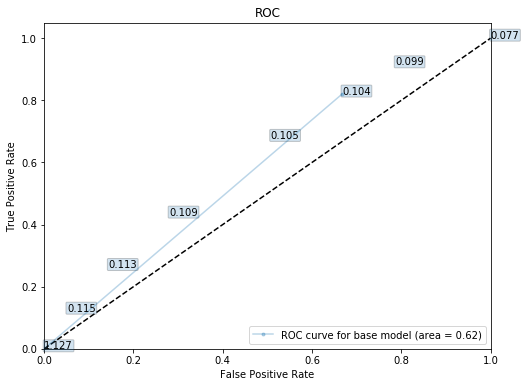

In [24]:
plt.figure(figsize=(8,6))
ax=make_roc("base model",logregcv, y_train_base, X_train_base, labe=2, skip=10)

- We can see that this base model does not do a very good job. Although the classification score is high, it has low AUC of 0.62, which is only slightly above the naive model AUC of 0.5.
- The high classification score is probably due to the fact that the dataset is unbalanced, where undelayed flights are far more than delayed ones.

### Improve the base model:
- Now we introduce more predictors other than airlines, such as origin airport, destination airport, scheduled time, etc, but not those variables that can leak information about delay or not.

In [25]:
df3 = df1.copy()
# df3.head()

total_airports = df1['ORIGIN_AIRPORT'].value_counts()[:40]
total_airports = total_airports.index.tolist()

df3 = df3[['AIRLINE','DISTANCE', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',\
         'SCHEDULED_TIME', 'DATE', 'DELAY_OR_NOT']]
# df3 = df3[['AIRLINE','DISTANCE', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',\
#          'SCHEDULED_TIME', 'DELAY_OR_NOT']]
df3 = df3[df3['ORIGIN_AIRPORT'].isin(total_airports)]
df3 = df3[df3['DESTINATION_AIRPORT'].isin(total_airports)]


# msk = np.random.rand(len(df3)) < 0.75
# df_train3 = df3[msk]
# df_test3 = df3[~msk]

df3['DATE'] = pd.to_datetime(df3['DATE'])
df_train3 = df3.ix[0:10000,:]
df_test3 = df3.ix[10001:20000,:]
# df_train3 = df3[df3['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
# df_test3 = df3[df3['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
# df_test3 = df_test3[df_test3['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]

categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_train3 = pd.get_dummies(df_train3, columns=categorical_cols, drop_first=True)
df_test3 = pd.get_dummies(df_test3, columns=categorical_cols, drop_first=True)

df_train3 = df_train3.reset_index(drop=True)

X_train3 = df_train3.drop(['DATE','DELAY_OR_NOT'], axis=1)
# X_train3 = df_train3.drop(['DELAY_OR_NOT'], axis=1)
y_train3 = df_train3['DELAY_OR_NOT']
X_test3 = df_test3.drop(['DATE','DELAY_OR_NOT'], axis=1)
# X_test3 = df_test3.drop(['DELAY_OR_NOT'], axis=1)
y_test3 = df_test3['DELAY_OR_NOT']

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [26]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train3, y_train3)
y_hat_train3 = logregcv.predict(X_train3)
y_hat_test3 = logregcv.predict(X_test3)
print("Train accuracy (fitted model): ", logregcv.score(X_train3, y_train3))
# print("Test accuracy (fitted model): ", logregcv.score(X_test3, y_test3))

preds3 = logregcv.predict_proba(X_train3)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_train3, preds3)
roc_auc3 = auc(fpr3, tpr3)
print("AUC of the fitted model:", roc_auc3)

Train accuracy (fitted model):  0.884919786096
AUC of the fitted model: 0.739625184233


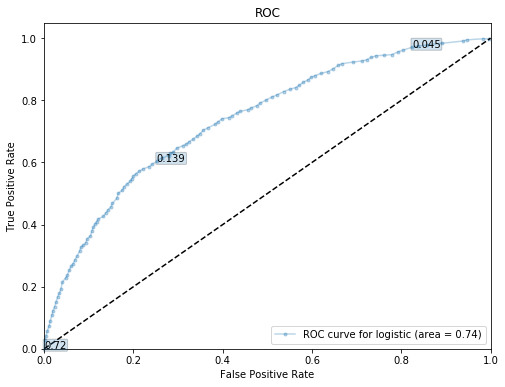

In [27]:
plt.figure(figsize=(8,6))
ax=make_roc("logistic",logregcv, y_train3, X_train3, labe=500, skip=10)

- The AUC has improved from 0.62 to 0.72 for the training set, and the curve looks much better than the one from the base model.
- Although the accuracy score is as high as 0.86, due to the unbalance, we need to further investigate properties like true positive rate and true negative rate. We will take a look at the confusion matrix next.

In [28]:
conf_mat = confusion_matrix(y_train3, y_hat_train3)
conf_df = pd.DataFrame(conf_mat, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df

,y_hat=0,y_hat = 1
y=0,4123,5
y=1,533,14


In [29]:
print("True Positive Rate for Fitted: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate for Fitted: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

True Positive Rate for Fitted:  0.0255941499086
True Negative Rate for Fitted:  0.99878875969


- Since the dataset is unbalanced, although the true negative rate is high, the true positive rate is extremely low.
- For a situation like this, we can trade some false positive rate for a higher true positive rate.
- We consider false positive rate at 0.2, 0.3, 0.4 and 0.5.

In [30]:
print("TPR when FPR=0.2:", tpr3[np.min([i for i, x in enumerate(fpr3) if x>=0.2])])
print("Threshold when FPR=0.2:",thresholds3[np.min([i for i, x in enumerate(fpr3) if x>=0.2])])

TPR when FPR=0.2: 0.557586837294
Threshold when FPR=0.2: 0.1537975559


In [31]:
print("TPR when FPR=0.3:", tpr3[np.min([i for i, x in enumerate(fpr3) if x>=0.3])])
print("Threshold when FPR=0.3:",thresholds3[np.min([i for i, x in enumerate(fpr3) if x>=0.3])])

TPR when FPR=0.3: 0.647166361974
Threshold when FPR=0.3: 0.128083074938


In [32]:
print("TPR when FPR=0.4:", tpr3[np.min([i for i, x in enumerate(fpr3) if x>=0.4])])
print("Threshold when FPR=0.4:",thresholds3[np.min([i for i, x in enumerate(fpr3) if x>=0.4])])

TPR when FPR=0.4: 0.740402193784
Threshold when FPR=0.4: 0.108151222901


In [33]:
print("TPR when FPR=0.5:", tpr3[np.min([i for i, x in enumerate(fpr3) if x>=0.5])])
print("Threshold when FPR=0.5:",thresholds3[np.min([i for i, x in enumerate(fpr3) if x>=0.5])])

TPR when FPR=0.5: 0.800731261426
Threshold when FPR=0.5: 0.0918850769496


- As we increase FPR, TPR gets higher and the model predicts more true flight delays.
- At FPR=0.3, we achieve TPR of 60%, using threshold of 0.16.
- A reasonable choice is to choose FPR at 0.4, and thus we have TPR of 70%, using threshold of 0.14.

### Question 5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.

In [34]:
logregcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [35]:
X_train3m = X_train3.as_matrix()
y_train3m = y_train3.as_matrix()

- Use bootstrap to get the significant coefficients at level of 95%:

In [36]:
B = 100 # Number of iterations

boot_coefs = np.zeros((X_train3m.shape[1],B)) # Create empty storage array for later use

for i in range(B):
    # Sampling WITH replacement the indices of a resampled dataset
    sample_index = np.random.choice(range(len(y_train3m)), size=len(y_train3m), replace=True)
    X_train_samples = X_train3m[sample_index]
    y_train_samples = y_train3m[sample_index]
    
    logistic_mod_boot = LogisticRegression(C=10, fit_intercept=False)
    logistic_mod_boot.fit(X_train_samples, y_train_samples)
    boot_coefs[:,i] = logistic_mod_boot.coef_

boot_coefs.shape

(94, 100)

In [37]:
ci_upper = np.percentile(boot_coefs, 97.5, axis=1)
ci_lower = np.percentile(boot_coefs, 2.5, axis=1)

In [38]:
sig_b_ct = 0

# if ci contains 0, then insignificant
idx = []
for i in range(len(ci_upper)):
    if ci_upper[i]<0 or ci_lower[i]>0:
        sig_b_ct += 1
        idx.append(i)

# print("Significant coefficents at 5pct level = %i / %i" % (sig_b_ct, X_train3.shape[1]))
print("Number of signidicant coefficients at 95% level:", sig_b_ct)

Number of signidicant coefficients at 95% level: 34


In [39]:
sig_cols = []
for i in idx:
    sig_cols.append(X_train3.columns[i])
sig_cols

['DISTANCE',
 'DAY_OF_WEEK',
 'SCHEDULED_TIME',
 'AIRLINE_AS',
 'AIRLINE_B6',
 'AIRLINE_DL',
 'AIRLINE_F9',
 'AIRLINE_NK',
 'ORIGIN_AIRPORT_CLT',
 'ORIGIN_AIRPORT_DCA',
 'ORIGIN_AIRPORT_DEN',
 'ORIGIN_AIRPORT_FLL',
 'ORIGIN_AIRPORT_HNL',
 'ORIGIN_AIRPORT_LAX',
 'ORIGIN_AIRPORT_LGA',
 'ORIGIN_AIRPORT_MCI',
 'ORIGIN_AIRPORT_OAK',
 'ORIGIN_AIRPORT_PDX',
 'ORIGIN_AIRPORT_PHX',
 'ORIGIN_AIRPORT_SAN',
 'ORIGIN_AIRPORT_SEA',
 'ORIGIN_AIRPORT_SJC',
 'ORIGIN_AIRPORT_SLC',
 'ORIGIN_AIRPORT_SMF',
 'ORIGIN_AIRPORT_SNA',
 'DESTINATION_AIRPORT_BOS',
 'DESTINATION_AIRPORT_CLT',
 'DESTINATION_AIRPORT_DEN',
 'DESTINATION_AIRPORT_LAX',
 'DESTINATION_AIRPORT_LGA',
 'DESTINATION_AIRPORT_MIA',
 'DESTINATION_AIRPORT_PHL',
 'DESTINATION_AIRPORT_STL',
 'DESTINATION_AIRPORT_TPA']

- There are 34 significant factors out of 94 total factors.
- The significant factors include flight distance, scheduled flight time, a few airline companies, as well as a few origin airports and destination airports.

### Question 6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set.

In [40]:
logregcv.fit(X_train3, y_train3)
print("Test accuracy (fitted model): ", logregcv.score(X_test3, y_test3))
preds3 = logregcv.predict_proba(X_test3)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test3, preds3)
roc_auc3 = auc(fpr3, tpr3)
print("AUC of the fitted model:", roc_auc3)

Test accuracy (fitted model):  0.884791666667
AUC of the fitted model: 0.690578095548


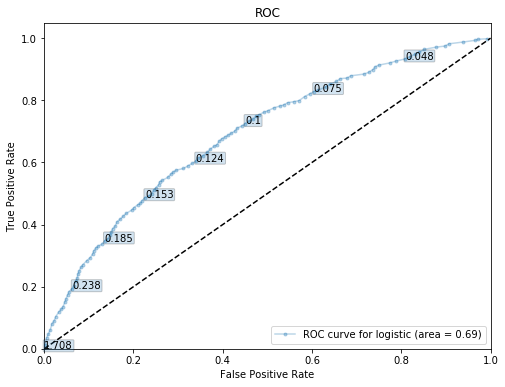

In [41]:
plt.figure(figsize=(8,6))
ax=make_roc("logistic",logregcv, y_test3, X_test3, labe=150, skip=10)

In [42]:
conf_mat = confusion_matrix(y_test3, y_hat_test3)
conf_df = pd.DataFrame(conf_mat, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df

,y_hat=0,y_hat = 1
y=0,4235,12
y=1,541,12


In [43]:
print("True Positive Rate for Fitted: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate for Fitted: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

True Positive Rate for Fitted:  0.0216998191682
True Negative Rate for Fitted:  0.997174476101


In [44]:
print("TPR when FPR=0.4:", tpr3[np.min([i for i, x in enumerate(fpr3) if x>=0.4])])
print("Threshold when FPR=0.4:",thresholds3[np.min([i for i, x in enumerate(fpr3) if x>=0.4])])

TPR when FPR=0.4: 0.678119349005
Threshold when FPR=0.4: 0.111186402688


In [45]:
# df_test_rest = df3[df3['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 31)]
df_test_rest = df3.ix[20001:, :]
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_test_rest = pd.get_dummies(df_test_rest, columns=categorical_cols, drop_first=True)
X_test_rest = df_test_rest.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_rest = df_test_rest['DELAY_OR_NOT']

In [46]:
# df_test_rest.shape
print("The rest of test set (excluding training and test) accuracy: ", logregcv.score(X_test_rest, y_test_rest))

y_hat_test_rest = logregcv.predict(X_test_rest)

The rest of test set (excluding training and test) accuracy:  0.882265665675


In [47]:
preds_rest = logregcv.predict_proba(X_test_rest)[:,1]
fpr_rest, tpr_rest, thresholds_rest = roc_curve(y_test_rest, preds_rest)
roc_auc_rest = auc(fpr_rest, tpr_rest)
print("AUC of the fitted model:", roc_auc_rest)

AUC of the fitted model: 0.679392256964


- The rest of the whole dataset has high accuracy score of 0.88.
- AUC is about 0.68. 
- Suspect the same problem as before due to the unbalance dataset. We will take a look at the confusion matrix next.

In [48]:
conf_mat2 = confusion_matrix(y_test_rest, y_hat_test_rest)
conf_df2 = pd.DataFrame(conf_mat2, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df2

,y_hat=0,y_hat = 1
y=0,326009,1179
y=1,42465,1046


In [49]:
print("True Positive Rate for the rest test set: ", float(conf_mat2[1][1])/(conf_mat2[1][1]+ conf_mat2[1][0]))
print("True Negative Rate for the rest test set: ", float(conf_mat2[0][0])/(conf_mat2[0][0] + conf_mat2[0][1]))

True Positive Rate for the rest test set:  0.0240398979568
True Negative Rate for the rest test set:  0.996396567111


- We can see that the default threshold at 0.5 gives us the same problem as occured in the training dataset, because the dataset is unbalanced.
- The problem is that TPR is very low, so we do not have successful flight delay prediction.
- We will use the threshold suggested from the training set (threshold = 0.14), so that we can trade some FPR for TPR.

In [50]:
# print("TPR when FPR=0.4:", tpr_rest[np.min([i for i, x in enumerate(fpr_rest) if x>=0.4])])
# print("Threshold when FPR=0.4:",thresholds_rest[np.min([i for i, x in enumerate(fpr_rest) if x>=0.4])])

In [51]:
threshold_pred = MultinomialNB(class_prior=[.86, .14]).fit(X_train3,y_train3).predict(X_test_rest)

In [52]:
df_test_rest["Airline"] = df1.AIRLINE
df_test_rest["prediction"] = logregcv.predict(X_test_rest)
df_test_rest["thres_prediction"] = threshold_pred
delay_prediction = df_test_rest.groupby('Airline')['prediction'].mean()
delay_prediction_thres = df_test_rest.groupby('Airline')['thres_prediction'].mean()

In [53]:
delay_prediction = delay_prediction.sort_values(ascending=False)
delay_prediction

Airline
NK    0.256586
F9    0.009583
B6    0.001892
WN    0.000477
VX    0.000000
US    0.000000
UA    0.000000
OO    0.000000
MQ    0.000000
HA    0.000000
EV    0.000000
DL    0.000000
AS    0.000000
AA    0.000000
Name: prediction, dtype: float64

In [54]:
delay_prediction_thres = delay_prediction_thres.sort_values(ascending=False)
delay_prediction_thres

Airline
NK    0.578115
VX    0.253140
B6    0.218251
UA    0.108604
HA    0.105303
F9    0.101102
AA    0.024866
WN    0.012157
US    0.001738
DL    0.001636
OO    0.000000
MQ    0.000000
EV    0.000000
AS    0.000000
Name: thres_prediction, dtype: float64

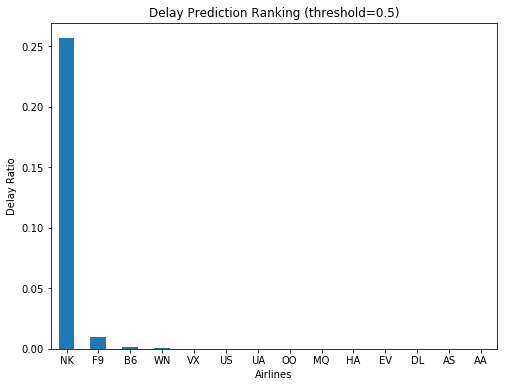

In [55]:
ax = delay_prediction.plot(kind='bar', title="Delay Prediction Ranking (threshold=0.5)", figsize=(8,6), rot=0)
ax.set_xlabel('Airlines')
ax.set_ylabel('Delay Ratio')
plt.show()

The airlines with the highest delay ratio predicted using threshold=0.5 are:
- NK(Spirit Airlines): 16.3%
- MQ(Envoy Aielines): 4.1%
- F9(Frontier Airlines): 1.8%
- UA(United Airlines): 0.9%
- OO(SkyWest Airlines): 0.08%

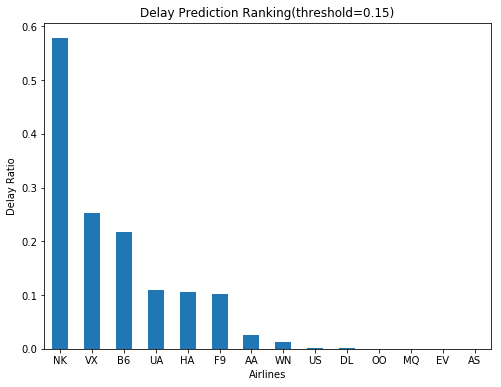

In [56]:
ax = delay_prediction_thres.plot(kind='bar', title="Delay Prediction Ranking(threshold=0.15)", figsize=(8,6), rot=0)
ax.set_xlabel('Airlines')
ax.set_ylabel('Delay Ratio')
plt.show()

The airlines with the highest delay ratio predicted using threshold=0.14 are:
- MQ (Envoy Aielines): 67.8%
- NK (Spirit Airlines): 50.8%
- F9 (Frontier Airlines): 23.2%
- UA (United Airlines): 1.5%
- B6 (JetBlue Airlines): 0.8%

- Combine the two bar plot together to compare the prediction results:

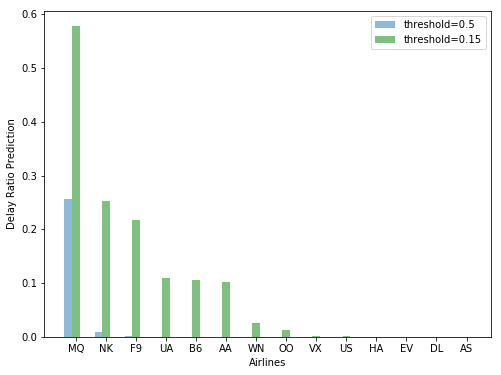

In [57]:
pos = list(range(14))
width = 0.25 
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos, delay_prediction, width, alpha = 0.5, color='C0', label="threshold=0.5") 
plt.bar([p + width for p in pos], delay_prediction_thres, width, alpha = 0.5, color='green', label="threshold=0.15")

ax.set_xlabel("Airlines")
ax.set_ylabel("Delay Ratio Prediction")
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(["MQ", "NK", "F9", "UA", "B6", "AA", "WN", "OO", "VX", "US", "HA", "EV", "DL", "AS"])

plt.legend(loc=1)
plt.show()

### Question 7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.

- Since we are given that a flight is truly delayed, we only need the sub-dataset where the DALEY_OR_NOT column is 1.

In [58]:
df_delay = df1[df1.DELAY_OR_NOT.isin([1])]
df_delay.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
19,2015-01-04,1,4,7,WN,958,N211WN,PHL,ATL,18:35:00,...,132.0,666,135.0,146.0,11.0,0.0,20.0,101.0,0.0,1
25,2015-07-22,7,22,3,EV,2682,N678AE,BRO,DFW,17:33:00,...,98.0,482,107.0,93.0,0.0,0.0,0.0,98.0,0.0,1
28,2015-03-23,3,23,1,OO,4629,N554CA,LAS,SEA,18:15:00,...,128.0,867,167.0,161.0,0.0,0.0,0.0,128.0,0.0,1
54,2015-03-12,3,12,4,US,2146,N951UW,LGA,BOS,14:00:00,...,38.0,184,63.0,106.0,38.0,0.0,0.0,0.0,0.0,1
59,2015-04-27,4,27,1,EV,2557,N673AE,SHV,DFW,16:41:00,...,148.0,190,64.0,72.0,8.0,0.0,95.0,45.0,0.0,1


In [59]:
print(list(df_delay))

['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_OR_NOT']


#### With the only information of "Airline": 

In [60]:
df4 = df_delay[["AIRLINE"]]
categorical_cols = ['AIRLINE']
df4 = pd.get_dummies(df4, columns=categorical_cols, drop_first=True)
df4["delay_log"] = np.log(df1["ARRIVAL_DELAY"])
df4.head()

X4 = df4.loc[:, df4.columns != 'delay_log']
y4 = df4["delay_log"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=42)

ols = LinearRegression(fit_intercept=True)
ols.fit(X_train4, y_train4)
print('OLS Train Score', ols.score(X_train4, y_train4))
print('OLS Test Score', ols.score(X_test4, y_test4))

OLS Train Score 0.0125780497985
OLS Test Score 0.010652444039


/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


#### Add more predictors as well as polynomial and interaction terms:

In [61]:
df_delay = df1[df1.DELAY_OR_NOT.isin([1])]

dep_time = df_delay['SCHED_DEP'].values
dep_hour = []
for t in dep_time:
    dep_hour.append(t[:2])
dep_h = list(map(int, dep_hour))
df_delay['dep_hour'] = dep_h

arr_time = df_delay['SCHED_ARR'].values
arr_hour = []
for t in arr_time:
    arr_hour.append(t[:2])
arr_h = list(map(int, arr_hour))
df_delay['arr_hour'] = arr_h

df_delay = df_delay[["AIRLINE", "MONTH", "DAY_OF_WEEK", "DISTANCE", "SCHEDULED_TIME", "dep_hour", "arr_hour"]]
df_delay["dep_hour2"] = df_delay["dep_hour"] ** 2
df_delay["arr_hour2"] = df_delay["arr_hour"] ** 2

df_delay["dep_arr"] = df_delay["dep_hour"] * df_delay["arr_hour"]
# df_delay["dep_DISTANCE"] = df_delay["dep_hour"] * df_delay["DISTANCE"]
# df_delay["arr_DISTANCE"] = df_delay["arr_hour"] * df_delay["DISTANCE"]

categorical_cols = ['AIRLINE', "MONTH", "DAY_OF_WEEK"]
df_delay = pd.get_dummies(df_delay, columns=categorical_cols, drop_first=True)
df_delay["delay_log"] = np.log(df1["ARRIVAL_DELAY"])
# df_delay.head()

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered

- Split the dataset into training and test, where test size is 0.25:

In [62]:
X = df_delay.loc[:, df_delay.columns != 'delay_log']
y = df_delay["delay_log"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

- Fit a linear regression model:

In [63]:
ols = LinearRegression(fit_intercept=True)
ols.fit(X_train2, y_train2)
print('OLS Train Score', ols.score(X_train2, y_train2))
print('OLS Test Score', ols.score(X_test2, y_test2))

OLS Train Score 0.0401519411742
OLS Test Score 0.0350644991468


- Use LASSO cross validation (10-fold) to select predictors:

In [64]:
lambdas = [.001,.005,1,5,10,50,100,500,1000]
clfl = LassoCV(cv=10, alphas=lambdas, fit_intercept=True, normalize=False)
preprocessing.StandardScaler()
clfl.fit(X_train2, y_train2)

print('Lasso Train Score', clfl.score(X_train2, y_train2))
print('Lasso Test Score', clfl.score(X_test2, y_test2))

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Train Score 0.0385004735859
Lasso Test Score 0.0344198275931


#### Side Note: If we have access to the information of delay reason and delay length, without any other predictors, the regression will have very high R^2 score:

In [65]:
df_cheat = df1[df1.DELAY_OR_NOT.isin([1])]
df_cheat = df_cheat[["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", \
                     "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]]
df_cheat["delay_log"] = np.log(df1["ARRIVAL_DELAY"])

X_cheat = df_cheat.loc[:, df_cheat.columns != 'delay_log']
y_cheat = df_cheat["delay_log"]

X_train_cheat, X_test_cheat, y_train_cheat, y_test_cheat = train_test_split(X_cheat, y_cheat, test_size=0.25, random_state=42)
ols = LinearRegression(fit_intercept=True)
ols.fit(X_train_cheat, y_train_cheat)
print('OLS Train Score (access to delay reason and length)', ols.score(X_train_cheat, y_train_cheat))
print('OLS Test Score (access to delay reason and length)', ols.score(X_test_cheat, y_test_cheat))

OLS Train Score (access to delay reason and length) 0.762607938675
OLS Test Score (access to delay reason and length) 0.738936066742


/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


## 209 Additional questions
### 1. (10pts) Engineer two additional features that will help improve the classification model's performance.

In [66]:
df_eng = df1.copy()
df_eng.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0


#### Additional Feature 1: 
- speed = distance/scheduled_time, 
- Reason: we reduce two predictors to one, which decreases the model complexity.

In [67]:
df_eng["speed"] = df_eng["DISTANCE"] / df_eng["SCHEDULED_TIME"]

dep_time = df_eng['SCHED_DEP'].values
dep_hour = []
for t in dep_time:
    dep_hour.append(t[:2])
dep_h = list(map(int, dep_hour))
df_eng['dep_hour'] = dep_h

df_eng.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT,speed,dep_hour
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0,5.429630,7
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0,5.724832,20
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0,4.833333,12
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0,7.688462,11
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0,5.076190,14


#### Additional Feature 2:
- Season: based on the month column.
- Month 3,4,5 = spring, Month 6,7,8 = summer, Month 9,10,11 = fall, Month 12, 1, 2 = winter
- Reason: Season may have an affect in this problem. For example, summer and Winter have more holidays, and people are more likely to visit other places.

In [68]:
def f(row):
    if row['MONTH'] == 3 or row['MONTH'] == 4 or row['MONTH'] == 5:
        val = 1
    elif row['MONTH'] == 6 or row['MONTH'] == 7 or row['MONTH'] == 8:
        val = 2
    elif row['MONTH'] == 9 or row['MONTH'] == 10 or row['MONTH'] == 11:
        val = 3
    else:
        val = 4
    return val

In [69]:
df_eng['season'] = df_eng.apply(f, axis=1)
df_eng.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT,speed,dep_hour,season
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,127.0,NaN,NaN,NaN,NaN,NaN,0,5.429630,7,3
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,118.0,NaN,NaN,NaN,NaN,NaN,0,5.724832,20,3
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,88.0,NaN,NaN,NaN,NaN,NaN,0,4.833333,12,2
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,235.0,NaN,NaN,NaN,NaN,NaN,0,7.688462,11,4
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,97.0,NaN,NaN,NaN,NaN,NaN,0,5.076190,14,3


In [70]:
total_airports = df1['ORIGIN_AIRPORT'].value_counts()[:40]
total_airports = total_airports.index.tolist()

df_eng = df_eng[['AIRLINE', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','speed', 'dep_hour','season',\
                 'DATE', 'DELAY_OR_NOT']]
df_eng = df_eng[df_eng['ORIGIN_AIRPORT'].isin(total_airports)]
df_eng = df_eng[df_eng['DESTINATION_AIRPORT'].isin(total_airports)]

categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'season']
df_eng = pd.get_dummies(df_eng, columns=categorical_cols, drop_first=True)


df_eng['DATE'] = pd.to_datetime(df_eng['DATE'])
# df_train_eng = df_eng[df_eng['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
# df_test_eng = df_eng[df_eng['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
# df_test_eng = df_test_eng[df_test_eng['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]
df_train_eng = df_eng.ix[0:10000,:]
df_test_eng = df_eng.ix[10001:20000,:]

# categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
# df_train_eng = pd.get_dummies(df_train_eng, columns=categorical_cols, drop_first=True)
# df_test_eng = pd.get_dummies(df_test_eng, columns=categorical_cols, drop_first=True)

# df_train_eng = df_train_eng.reset_index(drop=True)

X_train_eng = df_train_eng.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_train_eng = df_train_eng['DELAY_OR_NOT']
X_test_eng = df_test_eng.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_eng = df_test_eng['DELAY_OR_NOT']

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [71]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train_eng, y_train_eng)
y_hat_train_eng = logregcv.predict(X_train_eng)
y_hat_test_eng = logregcv.predict(X_test_eng)
print("Train accuracy (engineered): ", logregcv.score(X_train_eng, y_train_eng))
print("Test accuracy (engineered): ", logregcv.score(X_test_eng, y_test_eng))

preds_eng = logregcv.predict_proba(X_test_eng)[:,1]
fpr_eng, tpr_eng, thresholds_eng = roc_curve(y_test_eng, preds_eng)
roc_auc_eng = auc(fpr_eng, tpr_eng)
print("AUC of the fitted model:", roc_auc_eng)

Train accuracy (engineered):  0.909090909091
Test accuracy (engineered):  0.90375
AUC of the fitted model: 0.820430632664


In [72]:
conf_mat_eng = confusion_matrix(y_test_eng, y_hat_test_eng)
conf_df_eng = pd.DataFrame(conf_mat_eng, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_eng

,y_hat=0,y_hat = 1
y=0,4172,75
y=1,387,166


In [73]:
df_eng['DATE'] = pd.to_datetime(df_eng['DATE'])
# df_test_rest_eng = df_eng[df_eng['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 31)]
df_test_rest_eng = df_eng.ix[20001:, :]
# categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
# df_test_rest_eng = pd.get_dummies(df_test_rest_eng, columns=categorical_cols, drop_first=True)
X_test_rest_eng = df_test_rest_eng.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_rest_eng = df_test_rest_eng['DELAY_OR_NOT']

In [74]:
print("The rest of test set (excluding training and test) accuracy: ", logregcv.score(X_test_rest_eng, y_test_rest_eng))
y_hat_test_rest_eng = logregcv.predict(X_test_rest_eng)

The rest of test set (excluding training and test) accuracy:  0.899355002306


In [75]:
conf_mat_eng2 = confusion_matrix(y_test_rest_eng, y_hat_test_rest_eng)
conf_df_eng2 = pd.DataFrame(conf_mat_eng2, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_eng2

,y_hat=0,y_hat = 1
y=0,321454,5734
y=1,31575,11936


In [76]:
print("True Positive Rate for the rest test set: ", float(conf_mat_eng2[1][1])/(conf_mat_eng2[1][1]+ conf_mat_eng2[1][0]))
print("True Negative Rate for the rest test set: ", float(conf_mat_eng2[0][0])/(conf_mat_eng2[0][0] + conf_mat_eng2[0][1]))

True Positive Rate for the rest test set:  0.274321435959
True Negative Rate for the rest test set:  0.982474907393


In [77]:
preds_rest_eng = logregcv.predict_proba(X_test_rest_eng)[:,1]
fpr_rest_eng, tpr_rest_eng, thresholds_rest_eng = roc_curve(y_test_rest_eng, preds_rest_eng)
roc_auc_rest_eng = auc(fpr_rest_eng, tpr_rest_eng)
print("AUC of the engineered model:", roc_auc_rest_eng)

AUC of the engineered model: 0.820069399551


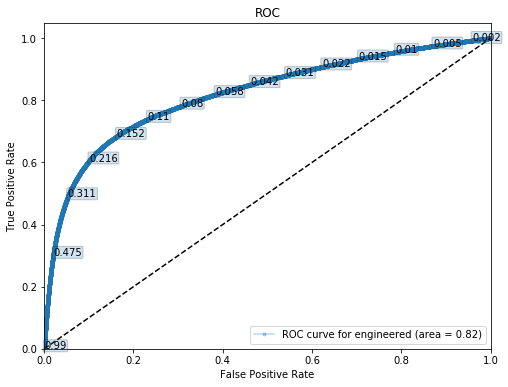

In [78]:
plt.figure(figsize=(8,6))
ax=make_roc("engineered",logregcv, y_test_rest_eng, X_test_rest_eng, labe=10000, skip=10)

- After introducing the two additional predictors, we can see AUC has increased from 0.72 to 0.82, and the TPR significantly increased as well.

### 2. (5pts) Add one additional feature from a data source not given to you. Do this only after you complete the rest of the exam.

- The additional feature I chose is whether the day of the flight is a holiday or not. 
- Reason: It is likely that more people will fly on a holiday, and therefore everything gets more crowded and delays will be more likely.

In [79]:
df_eng.head()

,DAY_OF_WEEK,speed,dep_hour,DATE,DELAY_OR_NOT,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_TPA,season_2,season_3,season_4
0,6,5.429630,7,2015-09-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,7.688462,11,2015-12-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,5.076190,14,2015-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,4,2.533333,9,2015-01-29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,4,7.550769,8,2015-09-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
df_holiday = pd.read_csv('federal-holidays-2015.csv')
new_header = df_holiday.iloc[0]
df_holiday = df_holiday[1:] 
df_holiday.columns = new_header
df_holiday.drop(df_holiday.tail(1).index,inplace=True)
df_holiday['Date'] = pd.to_datetime(df_holiday['Date'])
df_holiday["Holiday_or_not"] = 1
df_holiday = df_holiday[["Date", "Holiday_or_not"]]
df_holiday = df_holiday.rename(columns = {"Date": "DATE"})
df_holiday

,DATE,Holiday_or_not
1,2015-01-01,1
2,2015-01-19,1
3,2015-02-16,1
4,2015-05-25,1
5,2015-07-03,1
6,2015-07-04,1
7,2015-09-07,1
8,2015-10-12,1
9,2015-11-11,1
10,2015-11-26,1


In [81]:
df_new = pd.merge(df_eng, df_holiday, how='left', on='DATE')
df_new = df_new.fillna(0)

In [82]:
df_new.head()

,DAY_OF_WEEK,speed,dep_hour,DATE,DELAY_OR_NOT,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_SJC,DESTINATION_AIRPORT_SLC,DESTINATION_AIRPORT_SMF,DESTINATION_AIRPORT_SNA,DESTINATION_AIRPORT_STL,DESTINATION_AIRPORT_TPA,season_2,season_3,season_4,Holiday_or_not
0,6,5.429630,7,2015-09-19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
1,2,7.688462,11,2015-12-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
2,2,5.076190,14,2015-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,4,2.533333,9,2015-01-29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
4,4,7.550769,8,2015-09-17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [83]:
df_new['DATE'] = pd.to_datetime(df_new['DATE'])
# df_train_new = df_new[df_new['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
# df_test_new = df_new[df_new['DATE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 31)]
# df_test_new = df_test_new[df_test_new['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]
df_train_new = df_eng.ix[0:10000,:]
df_test_new = df_eng.ix[10001:20000,:]

# categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
# df_train_new = pd.get_dummies(df_train_new, columns=categorical_cols, drop_first=True)
# df_test_new = pd.get_dummies(df_test_new, columns=categorical_cols, drop_first=True)

X_train_new = df_train_new.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_train_new = df_train_new['DELAY_OR_NOT']
X_test_new = df_test_new.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_new = df_test_new['DELAY_OR_NOT']

In [84]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train_new, y_train_new)
y_hat_train_new = logregcv.predict(X_train_new)
y_hat_test_new = logregcv.predict(X_test_new)
print("Train accuracy (new feature): ", logregcv.score(X_train_new, y_train_new))
print("Test accuracy (new feature): ", logregcv.score(X_test_new, y_test_new))

preds_new = logregcv.predict_proba(X_test_new)[:,1]
fpr_new, tpr_new, thresholds_new = roc_curve(y_test_new, preds_new)
roc_auc_new = auc(fpr_new, tpr_new)
print("AUC of the fitted model:", roc_auc_new)

Train accuracy (new feature):  0.909090909091
Test accuracy (new feature):  0.90375
AUC of the fitted model: 0.820430632664


In [85]:
conf_mat_new = confusion_matrix(y_test_new, y_hat_test_new)
conf_df_new = pd.DataFrame(conf_mat_new, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_new

,y_hat=0,y_hat = 1
y=0,4172,75
y=1,387,166


In [86]:
# df_test_rest_new = df_new[df_new['DATE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 31)]
df_test_rest_new = df_eng.ix[20001:, :]
# categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
# df_test_rest_new = pd.get_dummies(df_test_rest_new, columns=categorical_cols, drop_first=True)
X_test_rest_new = df_test_rest_new.drop(['DATE','DELAY_OR_NOT'], axis=1)
y_test_rest_new = df_test_rest_new['DELAY_OR_NOT']

In [87]:
print("The rest of test set (excluding training and test) accuracy: ", logregcv.score(X_test_rest_new, y_test_rest_new))
y_hat_test_rest_new = logregcv.predict(X_test_rest_new)

The rest of test set (excluding training and test) accuracy:  0.899355002306


In [88]:
conf_mat_new2 = confusion_matrix(y_test_rest_new, y_hat_test_rest_new)
conf_df_new2 = pd.DataFrame(conf_mat_new2, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
conf_df_new2

,y_hat=0,y_hat = 1
y=0,321454,5734
y=1,31575,11936


In [89]:
print("True Positive Rate for the rest test set: ", float(conf_mat_new2[1][1])/(conf_mat_new2[1][1]+ conf_mat_new2[1][0]))
print("True Negative Rate for the rest test set: ", float(conf_mat_new2[0][0])/(conf_mat_new2[0][0] + conf_mat_new2[0][1]))

True Positive Rate for the rest test set:  0.274321435959
True Negative Rate for the rest test set:  0.982474907393


In [90]:
preds_rest_new = logregcv.predict_proba(X_test_rest_new)[:,1]
fpr_rest_new, tpr_rest_new, thresholds_rest_new = roc_curve(y_test_rest_new, preds_rest_new)
roc_auc_rest_new = auc(fpr_rest_new, tpr_rest_new)
print("AUC of the engineered model with the new feature:", roc_auc_rest_new)

AUC of the engineered model with the new feature: 0.820069399551


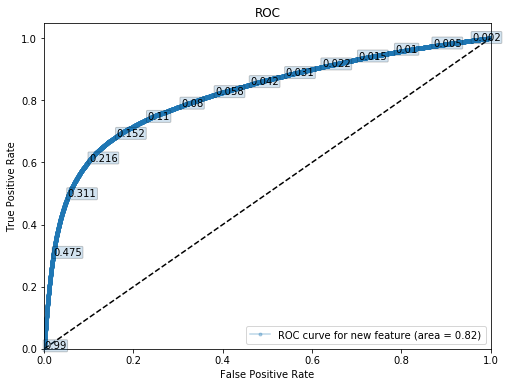

In [91]:
plt.figure(figsize=(8,6))
ax=make_roc("new feature",logregcv, y_test_rest_new, X_test_rest_new, labe=10000, skip=10)

- The additional feature of holiday or not does not significantly improve the model.

### Question 8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

Flight delays are related to a lot of factors, and in this problem we want to not only predict whether a flight will be delayed or not, but also how long it will be delayed if we know it is a delayed flight already. Therefore, we need to build two models, one classification model and one regression model.

Intuitively, we can first ask ourselves some questions based on daily life. Some airlines are known to have frequent delays, and also, some airports are not that well managed as others. Other potential variables include time of depature, for example. 

I built a logistic regression model to classify whether a flight is a delay or not, and use cross validation to find the right regularization parameter. However, due to the fact that our dataset is unbalanced that there are a lot more on-time flights than delayed flights, using the default threshold of 0.5 to classify does not give high true positive rate. One way to get more successful prediction of delay is to trade false positive rate (FPR) for true positive rate (TPR). From the analysis above, we can see that using a lower threshold of 0.14 can give much higher TPR of about 70% at the cost of FPR of about 40%. The classification accuracy is about 88%. The model predicts the three airlines of the hi

To predict the length of delay given a flight is delayed, I built a linear regression model with all possible variables and then use Lasso regression with 10-fold cross validation to select from those variables. The $R^2$ score of the model is about 0.035.